In [4]:
# Import Statement 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import make_scorer

from keras.models import Sequential
from keras.layers import Dense, Flatten 

## Mathematical analysis 


In [5]:
# import dataset 
df = pd.read_csv('Datasets.csv')

# print the first 5 rows of the dataframe
print(df.head())

                                      ID      Sender_IP  Sender_Port  \
0   10.42.0.211-104.97.95.172-59522-80-6  192.168.2.112         2142   
1  216.58.217.68-10.42.0.211-443-59345-6  147.32.84.170         2108   
2    10.42.0.151-54.192.38.7-52510-443-6  147.32.84.170         3805   
3  216.58.219.206-10.42.0.42-443-53294-6  147.32.84.180         3008   
4       10.42.0.1-10.42.0.42-53-62597-17  147.32.84.160        11697   

         Target_IP  Target_Port  Transport_Protocol  Duration  AvgDuration  \
0   75.126.101.175          443                   1      4.28     6.039028   
1    208.100.48.73           22                   1      3.00     1.500000   
2   125.14.233.194           22                   1      0.00     1.500000   
3  205.188.146.193           25                   1      2.96     2.021923   
4   184.173.217.40          443                   1      0.15     0.159373   

    PBS      AvgPBS   TBS    PBR       AvgPBR    TBR  Missed_Bytes  \
0  1174  856.833333  1894  1

In [6]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5472 non-null   object 
 1   Sender_IP           5472 non-null   object 
 2   Sender_Port         5472 non-null   int64  
 3   Target_IP           5472 non-null   object 
 4   Target_Port         5472 non-null   int64  
 5   Transport_Protocol  5472 non-null   int64  
 6   Duration            5472 non-null   float64
 7   AvgDuration         5472 non-null   float64
 8   PBS                 5472 non-null   int64  
 9   AvgPBS              5472 non-null   float64
 10  TBS                 5472 non-null   int64  
 11  PBR                 5472 non-null   int64  
 12  AvgPBR              5472 non-null   float64
 13  TBR                 5472 non-null   int64  
 14  Missed_Bytes        5472 non-null   int64  
 15  Packets_Sent        5472 non-null   int64  
 16  Packet

,Sender_Port,Target_Port,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000,5.472000e+03,5472.000000,5.472000e+03,5.472000e+03,5.472000e+03,5472.000000,5472.000000,5472.000000,5472.000000,5472.000000
mean,16649.802997,3544.247259,1.389072,12.964750,21.341809,317.964547,7.298220e+02,759.547332,1.300414e+04,1.322517e+04,1.315962e+04,462.317069,10.211075,11.732822,0.711110,0.629934
std,18265.060508,9404.524921,0.487584,305.059762,883.079233,3732.302430,1.863939e+04,6924.407943,1.847461e+05,1.312337e+05,1.880511e+05,17168.330107,104.135551,111.630205,0.601317,0.482866
min,53.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2690.000000,53.000000,1.000000,0.050000,0.218569,0.000000,2.875000e+01,80.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4840.500000,80.000000,1.000000,0.480000,1.500000,49.000000,5.604888e+01,120.000000,1.010000e+02,1.892578e+02,1.240000e+02,0.000000,2.000000,1.000000,0.833333,1.000000
75%,32245.000000,139.000000,2.000000,3.060000,7.583472,103.000000,1.414228e+02,361.250000,6.792500e+02,3.805434e+03,8.380000e+02,0.000000,6.000000,5.000000,1.000000,1.000000
max,65522.000000,65500.000000,2.000000,22083.710000,65178.233330,156289.000000,1.062472e+06,325674.000000,8.986288e+06,6.142982e+06,9.231445e+06,864072.000000,6561.000000,6510.000000,8.000000,1.000000


In [7]:
# list of columns in the dataframe
column = df.columns.tolist()
print(column)

['ID', 'Sender_IP', 'Sender_Port', 'Target_IP', 'Target_Port', 'Transport_Protocol', 'Duration', 'AvgDuration', 'PBS', 'AvgPBS', 'TBS', 'PBR', 'AvgPBR', 'TBR', 'Missed_Bytes', 'Packets_Sent', 'Packets_Received', 'SRPR', 'class']


Transport_Protocol:     The protocol used for communication (e.g., TCP, UDP)<br> <br> 
Duration:    Duration of the communication session<br><br> 
AvgDuration:    Average duration of communication sessions<br><br> 
PBS:    Packet Byte Size<br><br> 
AvgPBS:  Average Packet Byte Size<br><br> 
TBS:    Total Byte Size<br><br> 
PBR:    Packets Byte Rate<br><br> 
AvgPBR:     Average Packets Byte Rate<br><br> 
TBR:    Total Byte Rate<br><br> 
Missed_Bytes:    Amount of data missed or not successfully transmitted<br><br> 
Packets_Sent:   Number of packets sent during the communication session<br><br> 
Packets_Received:    Number of packets received during the communication session<br><br> 
SRPR:   Sender-to-Receiver Packet Ratio<br><br> 
Class:  A classification or label associated with the communication session<br><br> 

In [8]:
import pandas as pd

# Load the updated dataset (after classification)
df = pd.read_csv("Datasets.csv")

# Ensure 'class' column exists
if "class" in df.columns:
    
    # Define sample size per category (taking the smaller class size as the limit)
    min_class_size = df["class"].value_counts().min()

    # Perform Stratified Sampling (equal samples from both categories)
    sampled_data = df.groupby("class", group_keys=False).apply(lambda x: x.sample(n=min_class_size, random_state=42))
    
    # Save the sampled dataset
    sampled_data.to_csv("Sampled_Dataset.csv", index=False)
    
    # Display new distribution
    print(sampled_data["class"].value_counts())

else:
    print("Error: 'class' column not found in the dataset.")


class
0    2025
1    2025
Name: count, dtype: int64


In [9]:
from scipy.stats import ttest_ind
import pandas as pd

# Load the sampled dataset
df = pd.read_csv("Sampled_Dataset.csv")

# Ensure 'SRPR' and 'class' exist
if "SRPR" in df.columns and "class" in df.columns:
    
    # Separate data into two groups based on bottleneck occurrence
    bottleneck_data = df[df["class"] == 1]["SRPR"]
    no_bottleneck_data = df[df["class"] == 0]["SRPR"]
    
    # Perform independent t-test
    t_stat, p_value = ttest_ind(bottleneck_data, no_bottleneck_data, equal_var=False)
    
    # Print results
    print(f"T-Statistic: {t_stat:.3f}, P-value: {p_value:.5f}")

    # Interpretation
    if p_value < 0.05:
        print("Reject H₀: SRPR significantly differs between bottleneck and no bottleneck cases.")
    else:
        print("Fail to reject H₀: No strong evidence that SRPR impacts bottleneck occurrence.")

else:
    print("Error: Required columns ('SRPR' or 'class') not found in the dataset.")


T-Statistic: -22.046, P-value: 0.00000
Reject H₀: SRPR significantly differs between bottleneck and no bottleneck cases.


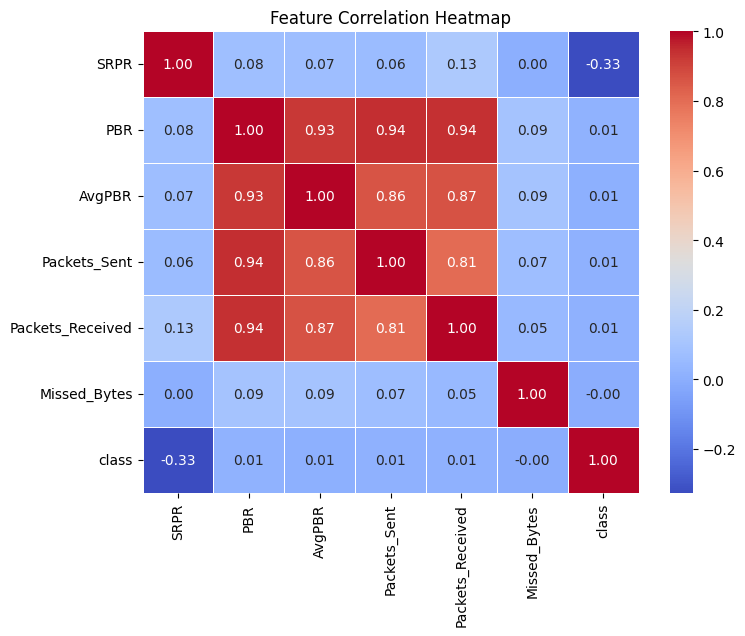

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("Sampled_Dataset.csv")

# Select only numerical columns for correlation
corr_features = ["SRPR", "PBR", "AvgPBR", "Packets_Sent", "Packets_Received", "Missed_Bytes", "class"]
corr_matrix = df[corr_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [11]:
%pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Selecting Features (Avoiding Highly Correlated Features)
features = ['SRPR', 'PBR', 'Packets_Sent', 'Packets_Received']
target = 'class'

# Load dataset (Assuming 'data' is already available)
X = df[features]
y = df[target]

# Split into Train and Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6889
ROC-AUC Score: 0.6889
Confusion Matrix:
 [[323  82]
 [170 235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.80      0.72       405
           1       0.74      0.58      0.65       405

    accuracy                           0.69       810
   macro avg       0.70      0.69      0.69       810
weighted avg       0.70      0.69      0.69       810



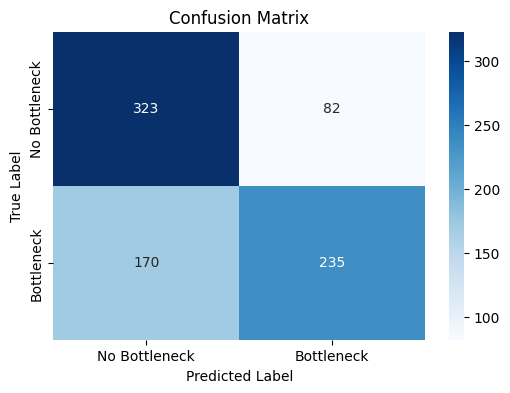

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Bottleneck', 'Bottleneck'], yticklabels=['No Bottleneck', 'Bottleneck'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


/Users/mohitmaurya/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


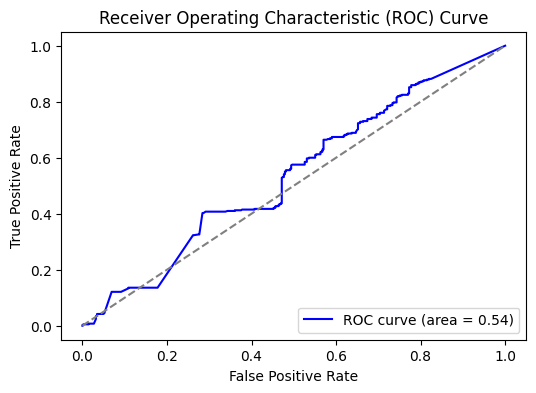

In [14]:
from sklearn.metrics import roc_curve, auc

# Get False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## data science


In [15]:
# removing the unwanted columns
df.drop(['ID', 'Sender_IP','Target_IP','Sender_Port', 'Target_Port'], axis = 1, inplace = True)
print(df.columns.tolist())

['Transport_Protocol', 'Duration', 'AvgDuration', 'PBS', 'AvgPBS', 'TBS', 'PBR', 'AvgPBR', 'TBR', 'Missed_Bytes', 'Packets_Sent', 'Packets_Received', 'SRPR', 'class']


In [16]:
df.describe()

,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,4050.000000,4050.000000,4050.000000,4050.000000,4.050000e+03,4050.000000,4.050000e+03,4.050000e+03,4.050000e+03,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,1.428889,16.007590,27.478957,370.839506,6.829487e+02,843.507407,1.426155e+04,1.410741e+04,1.422457e+04,584.709877,11.139012,12.585926,0.768018,0.500000
std,0.494978,354.398579,1026.407177,4317.436652,1.701045e+04,7976.020634,2.102563e+05,1.471259e+05,2.139057e+05,19952.372281,119.743414,125.695798,0.593708,0.500062
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.090000,0.264054,22.000000,3.884084e+01,80.000000,0.000000e+00,1.935000e+01,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.610000,1.631683,50.000000,7.342140e+01,137.000000,1.010000e+02,1.892578e+02,1.390000e+02,0.000000,3.000000,1.000000,1.000000,0.500000
75%,2.000000,6.407500,11.030000,106.750000,1.446136e+02,362.000000,6.720000e+02,4.460701e+03,8.257500e+02,0.000000,6.000000,5.000000,1.000000,1.000000
max,2.000000,22083.710000,65178.233330,156289.000000,1.062472e+06,325674.000000,8.986288e+06,6.142982e+06,9.231445e+06,864072.000000,6561.000000,6510.000000,8.000000,1.000000


In [17]:
# # since the transport protocol is categorical, we can use one hot encoding to convert it into numerical values
# df = pd.get_dummies(df, columns = ['Transport_Protocol'], prefix = 'Transport_Protocol')

In [18]:
clas = df['class']
df.drop('class', axis = 1, inplace = True)
df['class'] = clas
df.head()

,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
0,1,0.29,50.340000,81,72.500000,369,9469,11982.000000,9797,0,7,8,1.142857,0
1,2,22.00,28.191818,219,95.909091,359,54,22.272727,166,0,5,4,0.800000,0
2,2,10.96,10.960000,52,52.000000,136,25,25.000000,53,0,3,1,0.333333,0
3,2,22.14,19.397000,75,70.000000,159,6,37.200000,90,0,3,3,1.000000,0
4,1,1.71,3.399287,71,56.048880,279,1105,5332.637475,1313,0,5,5,1.000000,0


In [19]:
# saving the encoded data to a new csv file
df.to_csv("encoded_data.csv" , index=False)

<h1>Exploratory Data Analysis</h1> 

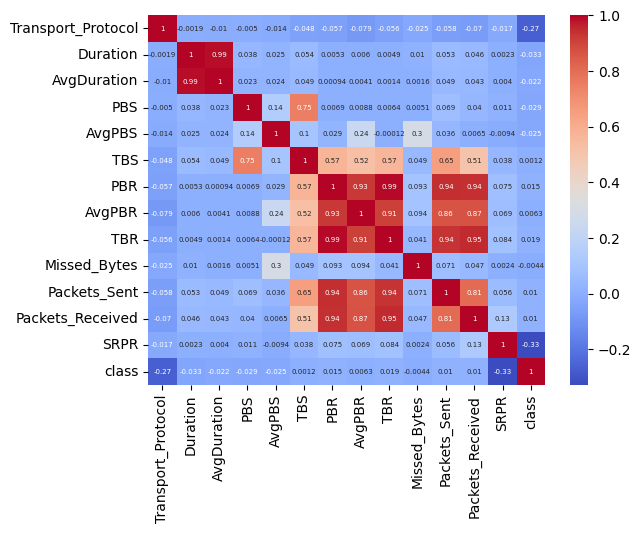

In [20]:
# plotting the correlation matrix
correlation = df.corr()
sns.heatmap(correlation , annot = True , cmap="coolwarm",annot_kws = {'size' : 5})
plt.show()

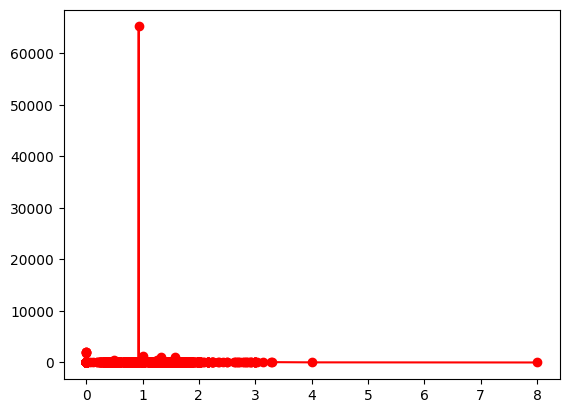

In [21]:
# plotting SRPR vs average duration
df = df.sort_values('SRPR')
plt.plot(df['SRPR'],df['AvgDuration'], marker="o" , color = 'red', linestyle = '-')

In [22]:
# we can see some outlying points in the plot, we can remove them and plot again, lets use quantile method to remove the outliers
Q1 = df['AvgDuration'].quantile(0.25)
Q3 = df['AvgDuration'].quantile(0.75)
# calculating inter quartile range
IQR = Q3 - Q1 

lower_thresh = Q1 - IQR*1.5
high_thresh = Q3 + IQR*1.5

df = df[(df["AvgDuration"]>=lower_thresh) &(df["AvgDuration"]<=high_thresh)]

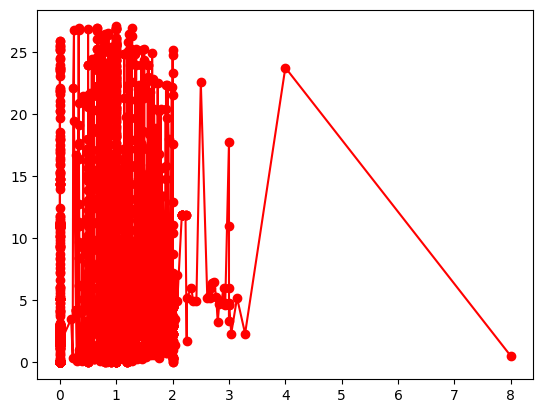

In [23]:
# plotting SRPR vs average duration
df = df.sort_values('SRPR')
plt.plot(df['SRPR'],df['AvgDuration'], marker="o" , color = 'red', linestyle = '-')

Text(0.5, 1.0, 'SRPR vs AvgDuration')

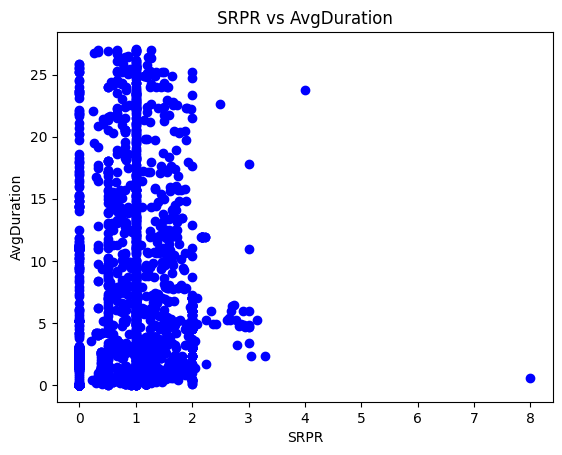

In [24]:
df = df.sort_values('SRPR')
plt.scatter(df['SRPR'],df['AvgDuration'], marker="o" , color = 'b',)
plt.xlabel('SRPR')
plt.ylabel('AvgDuration')
plt.title('SRPR vs AvgDuration')

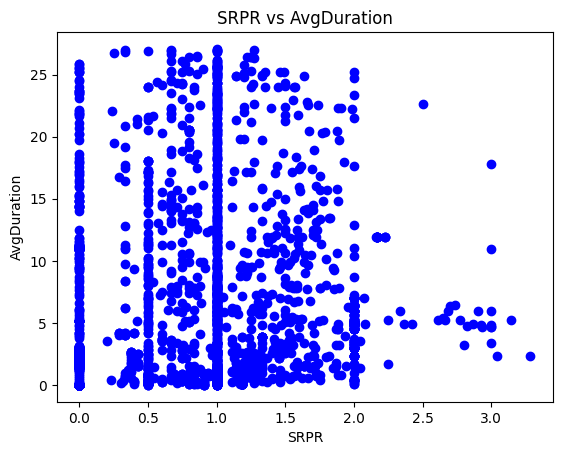

In [25]:
# now less outliers are present in the plot
df = df.sort_values('SRPR')
df = df[df['SRPR']<4 ]
plt.scatter(df['SRPR'],df['AvgDuration'],marker="o", color = 'b')
plt.xlabel('SRPR')
plt.ylabel('AvgDuration')
plt.title('SRPR vs AvgDuration')
plt.show()

In [26]:
df.describe()

,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR,class
count,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000,3.590000e+03,3.590000e+03,3.590000e+03,3590.000000,3590.000000,3590.000000,3590.000000,3590.000000
mean,1.400836,4.262903,4.512361,150.528969,208.682110,477.238719,1.081106e+04,1.103465e+04,1.149031e+04,303.675766,8.013092,10.979387,0.754886,0.540111
std,0.490136,10.391554,6.623987,429.026115,1163.763664,2568.896967,1.620369e+05,1.162437e+05,1.668729e+05,14118.891216,61.147690,119.509218,0.594871,0.498458
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.060000,0.220435,0.000000,35.322827,75.000000,0.000000e+00,5.138889e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.430000,1.489408,48.000000,54.238889,106.000000,1.040000e+02,1.892578e+02,1.280000e+02,0.000000,2.000000,1.000000,1.000000,1.000000
75%,2.000000,3.000000,5.903379,91.000000,137.586035,343.000000,6.477500e+02,4.273112e+03,8.230000e+02,0.000000,5.000000,5.000000,1.000000,1.000000
max,2.000000,130.290000,27.076364,15699.000000,36701.187820,132412.000000,8.971045e+06,6.142982e+06,9.231445e+06,845645.000000,3283.000000,6510.000000,3.285714,1.000000


In [27]:
# Split the data into training (80%), validation (10%), and testing (10%) sets
x = df.drop('class', axis = 1)
y = df['class']

x_test, x_train,y_test, y_train  = tts(x, y, test_size = 0.8, random_state = 42)


In [28]:
print(f"Training set : {x_train.shape[0]}")
print(f"Testing set : {y_test.shape[0]}")
print(f"Testing set : {x_test.shape[0]}")

Training set : 2872
Testing set : 718
Testing set : 718


In [29]:
x_val,x_test, y_val  , y_test = tts(x_test, y_test, test_size = 0.5, random_state = 42)

In [30]:
print(f"Validation set : {x_val.shape[0]}")
print(f"Testing set : {y_test.shape[0]}")

Validation set : 359
Testing set : 359


In [31]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

print (f"Training set : {x_train.shape[1]}")


(2872, 13)
(359, 13)
(359, 13)
(2872,)
(359,)
(359,)
Training set : 13


<h1>Model creation</h1>

<h2>DNN</h2>

In [75]:
# only DNN model
# Define the model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
model = Sequential()



# Add Dense layers
model.add(Dense(55, activation='relu' ,input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 55)                770       
                                                                 
 dense_28 (Dense)            (None, 32)                1792      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2595 (10.14 KB)
Trainable params: 2595 (10.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### model 2

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(14,)),  # Input layer (14 features) → Dense(128) → ReLU
    BatchNormalization(),  # Batch Normalization
    Dropout(0.2),  # Dropout (0.2)
    
    Dense(64, activation='relu'),  # Dense(64) → ReLU
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),  # Dense(32) → ReLU
    BatchNormalization(),
    
    Dense(1, activation='sigmoid')  # Output Layer (Sigmoid)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1920      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)               

In [41]:
x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_val = x_val.astype('float64')
y_val = y_val.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')

print(x_train.dtypes)

x_train.describe()

Transport_Protocol    float64
Duration              float64
AvgDuration           float64
PBS                   float64
AvgPBS                float64
TBS                   float64
PBR                   float64
AvgPBR                float64
TBR                   float64
Missed_Bytes          float64
Packets_Sent          float64
Packets_Received      float64
SRPR                  float64
dtype: object


,Transport_Protocol,Duration,AvgDuration,PBS,AvgPBS,TBS,PBR,AvgPBR,TBR,Missed_Bytes,Packets_Sent,Packets_Received,SRPR
count,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2872.000000,2.872000e+03,2.872000e+03,2.872000e+03,2872.000000,2872.000000,2872.000000,2872.000000
mean,1.399373,4.112970,4.389123,145.473886,209.471143,465.697772,1.060037e+04,1.101683e+04,1.126375e+04,365.551532,7.858983,10.771936,0.746763
std,0.489855,9.942971,6.526619,440.281292,1269.299928,2759.056414,1.756596e+05,1.260299e+05,1.808902e+05,15784.229217,66.053676,129.583791,0.593122
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.060000,0.218569,0.000000,35.322827,75.000000,0.000000e+00,3.129870e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.430000,1.484672,47.000000,50.000000,106.000000,1.010000e+02,1.892578e+02,1.260000e+02,0.000000,2.000000,1.000000,1.000000
75%,2.000000,3.000000,5.296500,89.250000,123.620168,336.500000,6.342500e+02,3.900732e+03,8.065000e+02,0.000000,5.000000,5.000000,1.000000
max,2.000000,130.290000,27.076364,15699.000000,36701.187820,132412.000000,8.971045e+06,6.142982e+06,9.231445e+06,845645.000000,3283.000000,6510.000000,3.285714


In [84]:
# train the model 
history = model.fit(x_train, y_train, epochs = 40, batch_size = 30, validation_data = (x_val, y_val))

# print(x_train.shape)

Epoch 1/40
96/96 [==============================] - 0s 1ms/step - loss: 14.0456 - accuracy: 0.7827 - val_loss: 41.3739 - val_accuracy: 0.7827
Epoch 2/40
96/96 [==============================] - 0s 652us/step - loss: 222.0321 - accuracy: 0.7465 - val_loss: 105.5868 - val_accuracy: 0.7688
Epoch 3/40
96/96 [==============================] - 0s 638us/step - loss: 63.3632 - accuracy: 0.7772 - val_loss: 44.9771 - val_accuracy: 0.7744
Epoch 4/40
96/96 [==============================] - 0s 650us/step - loss: 127.2566 - accuracy: 0.7768 - val_loss: 264.0649 - val_accuracy: 0.7549
Epoch 5/40
96/96 [==============================] - 0s 634us/step - loss: 61.8448 - accuracy: 0.7333 - val_loss: 49.1076 - val_accuracy: 0.7409
Epoch 6/40
96/96 [==============================] - 0s 638us/step - loss: 28.4890 - accuracy: 0.7573 - val_loss: 18.5188 - val_accuracy: 0.7911
Epoch 7/40
96/96 [==============================] - 0s 640us/step - loss: 40.8070 - accuracy: 0.7702 - val_loss: 28.3243 - val_accurac

Model testing 


In [93]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred_class = (y_pred > 0.42).astype(int)

print(classification_report(y_test, y_pred_class))
print(confusion_matrix(y_test, y_pred_class))


12/12 [==============================] - 0s 425us/step
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       176
         1.0       0.79      0.82      0.81       183

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

[[137  39]
 [ 33 150]]


Model Check

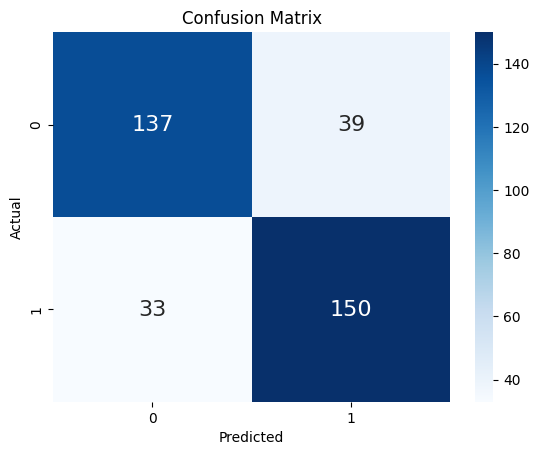

In [86]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

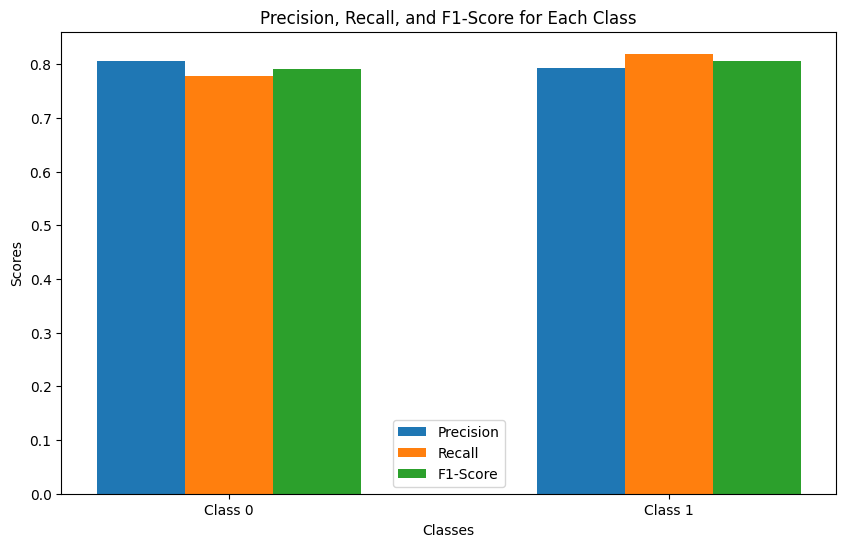

In [87]:
from sklearn.metrics import precision_recall_fscore_support

# Compute precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_class)

# Create labels
labels = ['Class 0', 'Class 1']

# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(labels))

bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar3 = ax.bar(index + 2*bar_width, f1_score, bar_width, label='F1-Score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### plots 

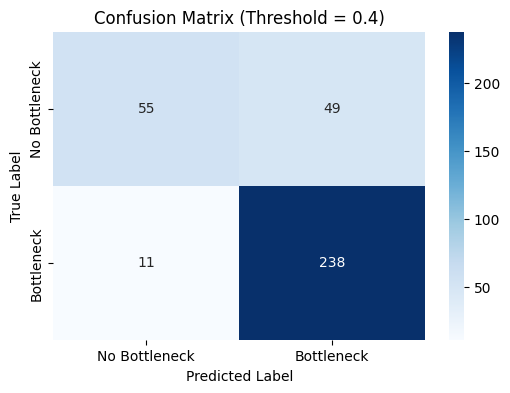

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Given Confusion Matrix
cm = np.array([[55, 49],  # True Class 0
               [11, 238]])  # True Class 1

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Bottleneck", "Bottleneck"], yticklabels=["No Bottleneck", "Bottleneck"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Threshold = 0.4)")
plt.show()


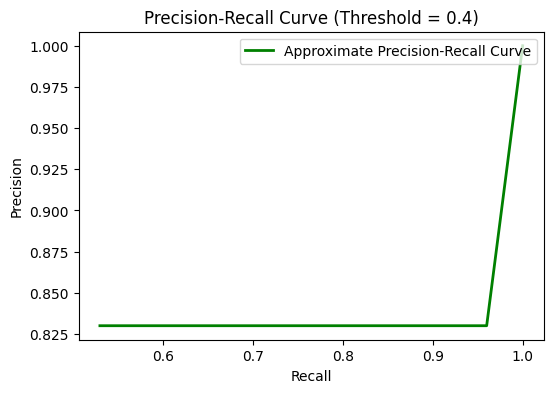

In [52]:
from sklearn.metrics import precision_recall_curve

# Approximate values based on reported Precision & Recall
precision = [0.83, 0.83, 1]
recall = [0.53, 0.96, 1]

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color="green", lw=2, label="Approximate Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Threshold = 0.4)")
plt.legend(loc="upper right")
plt.show()


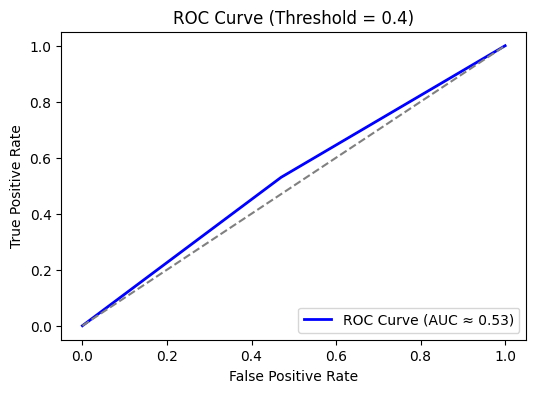

In [53]:
from sklearn.metrics import roc_curve, auc

# Approximate values based on reported Recall & False Positive Rate
tpr = [0, 0.53, 1]  # True Positive Rate (Recall for Class 1 = 0.96)
fpr = [0, 0.47, 1]  # False Positive Rate (FP / Total Actual Negatives)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC ≈ {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Threshold = 0.4)")
plt.legend(loc="lower right")
plt.show()


# TEST 

Training with batch=32, lr=0.001, dropout=0.2


Training with batch=32, lr=0.001, dropout=0.3


Training with batch=32, lr=0.0005, dropout=0.2


Training with batch=32, lr=0.0005, dropout=0.3


Training with batch=42, lr=0.001, dropout=0.2


Training with batch=42, lr=0.001, dropout=0.3


Training with batch=42, lr=0.0005, dropout=0.2


Training with batch=42, lr=0.0005, dropout=0.3


Training with batch=64, lr=0.001, dropout=0.2


Training with batch=64, lr=0.001, dropout=0.3


Training with batch=64, lr=0.0005, dropout=0.2


Training with batch=64, lr=0.0005, dropout=0.3

Best Hyperparameters: {'batch_size': 64, 'learning_rate': 0.0005, 'dropout_rate': 0.3}
Best Accuracy: 0.8948625922203064
27/27 [==============================] - 0s 418us/step


/Users/mohitmaurya/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


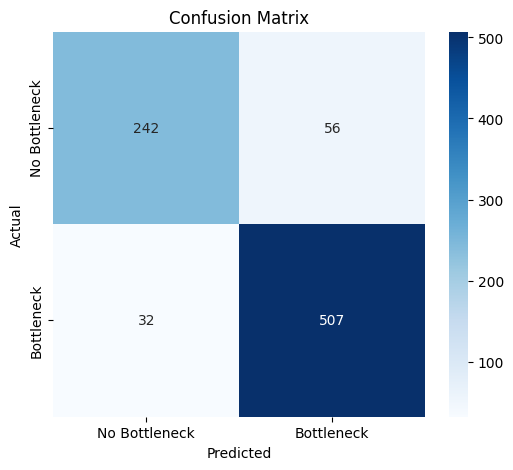


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85       298
           1       0.90      0.94      0.92       539

    accuracy                           0.89       837
   macro avg       0.89      0.88      0.88       837
weighted avg       0.89      0.89      0.89       837

27/27 [==============================] - 0s 734us/step


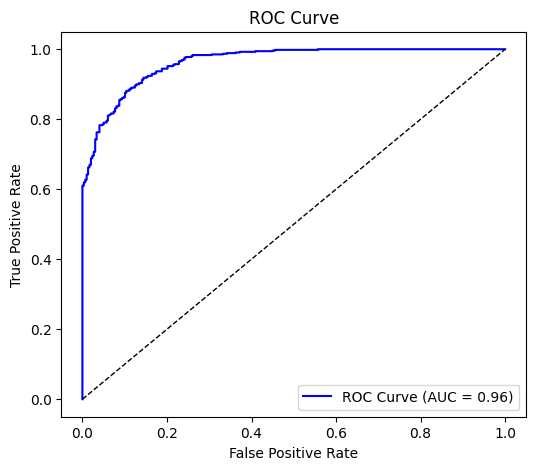

In [94]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("cleaned_data.csv")

# Drop unnecessary columns (if any non-numeric columns exist)
data = data.select_dtypes(include=[np.number])

# Split features (X) and target label (y)
X = data.drop(columns=['class'])  # Drop target variable 'class'
y = data['class']  # Target variable (0 = No Bottleneck, 1 = Bottleneck)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalize feature values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define Deep Learning Model
def create_model(learning_rate=0.001, dropout_rate=0.2):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Hyperparameter Tuning: Define values to test
batch_sizes = [32, 42, 64]
learning_rates = [0.001, 0.0005]
dropout_rates = [0.2, 0.3]

best_model = None
best_accuracy = 0
best_params = {}

# Grid Search for Hyperparameters
for batch_size in batch_sizes:
    for lr in learning_rates:
        for dropout in dropout_rates:
            print(f"Training with batch={batch_size}, lr={lr}, dropout={dropout}")
            model = create_model(learning_rate=lr, dropout_rate=dropout)
            history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            # Evaluate model
            _, test_acc = model.evaluate(X_test, y_test, verbose=0)
            
            if test_acc > best_accuracy:
                best_accuracy = test_acc
                best_model = model
                best_params = {"batch_size": batch_size, "learning_rate": lr, "dropout_rate": dropout}

print("\nBest Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Save Best Model
best_model.save("bottleneck_detection_model.h5")

# Model Evaluation on Test Set
y_pred = (best_model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Bottleneck", "Bottleneck"], yticklabels=["No Bottleneck", "Bottleneck"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
y_pred_prob = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [96]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("bottleneck_detection_model.h5")  # Replace with your actual file path

# View the model summary
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_27 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_28 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_26 (Dropout)        (None, 64)              